In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import rospy


rospy.init_node('takeshi_hmm_nav')


In [3]:
%%script bash --bg
rviz -d data/3_navigation.rviz > /dev/null 2>&1

Starting job # 0 in a separate thread.


In [7]:
import tf
import numpy as np

from tf import transformations
from geometry_msgs.msg import Quaternion

listener = tf.TransformListener()

In [8]:
(trans,rot) = listener.lookupTransform('/map', '/base_footprint', rospy.Time(0))
e = tf.transformations.euler_from_quaternion(rot)

trans, np.rad2deg(e)

([-0.0011145877345268556, -0.0028419816529557567, 0.0],
 array([ 0.        ,  0.        , -1.49497517]))

In [9]:
import moveit_commander
import moveit_msgs.msg


In [10]:
base=  moveit_commander.MoveGroupCommander('base')


In [11]:
base.get_current_joint_values()

[-0.0006474577692032746, -0.003050514226194191, -0.02786024875273501]

In [15]:
base_pose_goal

[-0.0007130562996275347, -0.0029891129346083564, -0.027322344611466105]

In [14]:
base_pose_goal=base.get_current_joint_values()

In [16]:
##TASK1 known location (0.9036305362874397, 0.6046739511772933, 1.7161565200073896)
task1_location= (0.9036305362874397, 0.6046739511772933, 1.7161565200073896)
x , y , th = task1_location
base.set_joint_value_target([x,y,th])
base.go()


False

In [11]:
#### IT TAKES DEGREES KNOT RADIANS :O:O:O:O:O:O:O:O:O:O:O:O
### MAP COORDINATES "SIMPLE MOVE"

move_base_goal(.5,y,np.rad2deg(th))


True

In [9]:
#### tilt head  
move_head_tilt(-1)

True

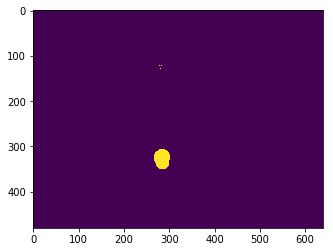

In [16]:
image_data = rgbd.get_image()



#rgbd.set_h(40, 220)
rgbd.set_h(45, 155)
region = rgbd.get_region()
plt.imshow(region)



In [22]:
#Get 3d coords of segmented object

rgbd.get_xyz()

[-0.08383949, 0.04635876, 1.0485512]

In [23]:
rgbd.set_coordinate_name("unk_1")

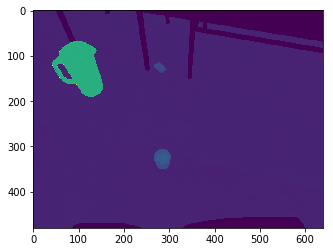

In [17]:
# 画像の色相の値を取得します Get hue channel
h_image = rgbd.get_h_image()
# 色相画像を表示してみます Display the hue channel
plt.imshow(h_image)

In [18]:
from ipywidgets import interact

def f(lower = 0, upper = 255):
    yellow_region = (h_image > lower) & (h_image < upper)
    plt.imshow(yellow_region)

interact(f, lower=(0, 255, 5), upper=(0, 255, 5))

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj11J2xvd2VyJywgbWF4PTI1NSwgc3RlcD01KSwgSW50U2xpZGVyKHZhbHVlPTI1NSwgZGVzY3JpcHTigKY=


<function __main__.f>

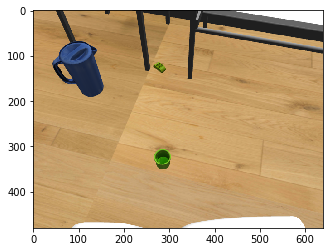

In [19]:
### utils can capture,,, refer to codes/msg_img_to_cv2.py
# 画像を取得します Get image data
image_data = rgbd.get_image()
# 取得した画像を表示してみます Display the image data
plt.imshow(image_data)

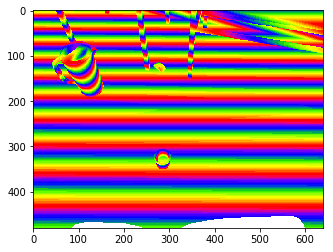

In [20]:
points_data = rgbd.get_points()
plt.imshow(points_data['z'] , cmap='prism')

In [16]:
##TASK2 known location (2.3678251347944403,1.2, 1.28)
move_head_tilt(0)


x,y,th =(2.3678251347944403,1.2, 1.28)
move_base_goal(x,y,np.rad2deg(th))

move_head_tilt(-1)



True

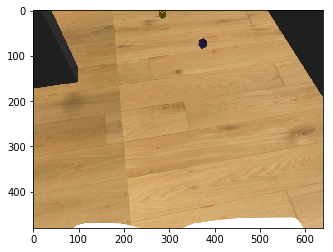

In [21]:
### utils can capture,,, refer to codes/msg_img_to_cv2.py
# 画像を取得します Get image data
image_data = rgbd.get_image()
# 取得した画像を表示してみます Display the image data
plt.imshow(image_data)

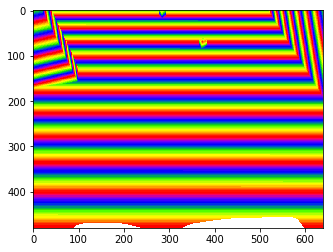

In [22]:
points_data = rgbd.get_points()
plt.imshow(points_data['z'],cmap='prism')

In [25]:

tf_odom=get_relative_coordinate('map','base_footprint')
x,y = tf_odom.translation.x, tf_odom.translation.y
rot_odom=tf_odom.rotation.w,tf_odom.rotation.x,tf_odom.rotation.y,tf_odom.rotation.z
euler=tf.transformations.euler_from_quaternion(rot_odom)
th=euler[0]

In [26]:
x,y,th


(0.001085827013042849, 0.1046366462191313, -3.1092742419973436)

In [19]:
move_base_goal(0.1,0.1,0)



True